In [1]:
import pandas as pd  # import pandas as pd
import os  # no need to set an alias, since os is already short
import statsmodels.formula.api as smf 

# define the file and sheetname we want to read. Note that the file
# has to be present in the local working directory!
fn: str = "storks_vs_birth_rate.csv"  # file name

# this little piece of code could have saved me 20 minutes
if not os.path.exists(fn):  # check if the file is actually there
    raise FileNotFoundError(f"Cannot find file {fn}")

df :pd.DataFrame = pd.read_csv(fn)  # read data
df.columns = ["Babies", "Storks"] # replace colum names
df.head() # test that all went well

,Babies,Storks
0,83,100
1,87,300
2,118,1
3,117,5000
4,59,9


In [2]:
# import statsmodels.api as sm
import numpy as np

model   = smf.ols(formula="Babies ~ Storks",data=df)
results = model.fit()

yn = results.predict()

# create a list with 5 x-values for which we want the predictions
newx :np.array = np.linspace(0,30000,5)

print(f" newx = {newx}")

# get the prrediction
prediction = results.get_prediction(exog=dict(Storks=newx))

# get the confidence intervals at newx locations
ci :np.array = prediction.conf_int()
print(f" ci = {ci}")

 newx = [    0.  7500. 15000. 22500. 30000.]
 ci = [[  25.60903207  424.44834033]
 [ 262.42790764  619.53409124]
 [ 393.92939094  919.93723441]
 [ 483.47868295 1262.29256887]
 [ 560.36720228 1617.30867601]]


the output of the prediction method is an array where each row
contains the lower, and upper estimate for given point in `x`. If we
want to draw this as a polygon, we have to create a list of
coordinates for each polygon point defined by `x` and `ci`. Thus we
have to first extract the upper and lower boundaries. From the above
printout, you can see that ci is organized as sequence of lists, so we
can use slicing syntax to extract the first value of each list. This
is straight forward for the lower values. However, if you draw
polygon, you want to keep drawing in the same direction, so now we
have to reverse the order of our coordinates, and append them to the
lower set of coordinates. Here is use the `numpy.flip()` function (you
could also use slicing notation `[::-1]`)



In [3]:
pl = ci[:, 0]  # get the lower boundary prediction values
pu = ci[:, 1]  # get the upper boundaryt prediction values

print(f"pl = {pl}\n")
print(f"pu = {pu}\n")

# assemble both vectors into one long one, with pu in reversed order
py = np.append(pl, np.flip(pu))
print(f"py = {py}\n")

pl = [ 25.60903207 262.42790764 393.92939094 483.47868295 560.36720228]

pu = [ 424.44834033  619.53409124  919.93723441 1262.29256887 1617.30867601]

py = [  25.60903207  262.42790764  393.92939094  483.47868295  560.36720228
 1617.30867601 1262.29256887  919.93723441  619.53409124  424.44834033]



Now we have our y=values in ascending order for the lower polygon
boundary, and in reverse order for the upper polygon boundary. 

Next we need to create vector of increasing and decreasing x-values to
 match the py-values.



In [4]:
px = np.append(newx,np.flip(newx))
print(px)

[    0.  7500. 15000. 22500. 30000. 30000. 22500. 15000.  7500.     0.]


all what is left to do is to combine `px` and `py` into a common array
which is understood by the matplotlib polygon function.



In [5]:
coords = np.append(px,py)
coords = np.reshape(coords,(2,10)).T
print(f"coords = {coords}")

coords = [[0.00000000e+00 2.56090321e+01]
 [7.50000000e+03 2.62427908e+02]
 [1.50000000e+04 3.93929391e+02]
 [2.25000000e+04 4.83478683e+02]
 [3.00000000e+04 5.60367202e+02]
 [3.00000000e+04 1.61730868e+03]
 [2.25000000e+04 1.26229257e+03]
 [1.50000000e+04 9.19937234e+02]
 [7.50000000e+03 6.19534091e+02]
 [0.00000000e+00 4.24448340e+02]]


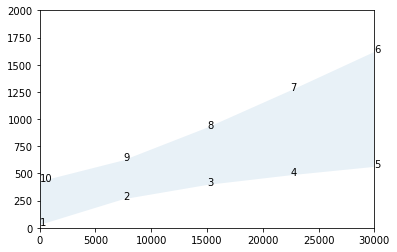

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
fig, ax = plt.subplots()  #
fig.set_size_inches(6,4)
pol = Polygon(coords,alpha=0.1)
ax.set_xlim(0,30000)
ax.set_ylim(0,2000)
ax.add_patch(pol)

i = 1
for r in coords:
    ax.text(r[0],r[1],str(i))
    i = i + 1
  #  print(f"i = {i},r[0] ={r[0]},r[1] = {r[1]}")


plt.show()
fig.savefig("polygon_n.png")

In [19]:
prediction()

TypeError: 'PredictionResults' object is not callable

In [17]:
print(prediction)

In [21]:
dict(depth=newx)

{'depth': array([    0.,  7500., 15000., 22500., 30000.])}